In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#WITH SVOL
call_df=pd.read_csv('/content/drive/MyDrive/black_scholes_option_pricing/splitted_put_with_svol')
# put_df=pd.read_csv('/content/drive/MyDrive/black_scholes_option_pricing/Put_with_svol.csv')

In [ ]:
for i in range(len(call_df)):
  if (call_df["Expiration"][i]==0):
    call_df["Expiration"][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
call_df.head(1)

,Unnamed: 0,Unnamed: 0.1,Date,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol,Moneyness_put
0,0,0,2013-12-31,5800,6.3,30,6304.0,0.002051,0.135503,8.82,0.780877,0.006838,OTM


In [ ]:
call_df_OTM = call_df[call_df["Moneyness_put"]=="ITM"]
call_df_OTM.drop(["Moneyness_put"], axis=1, inplace=True)
call_df = call_df_OTM

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
call_df.head(1)

,Unnamed: 0,Unnamed: 0.1,Date,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol
13,13,13,2014-01-03,6400,183.0,27,6211.149902,-0.001607,0.133806,8.834,183.081932,0.0068


In [ ]:
call_df[call_df["Expiration"]==0]

,Unnamed: 0,Unnamed: 0.1,Date,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol


In [ ]:
call_df=call_df.set_index(['Date'])
# put_df=put_df.set_index(['Date'])

In [ ]:
call_df=call_df.iloc[:,1:]
# put_df=put_df.iloc[:,1:]

In [ ]:
call_df

,Unnamed: 0.1,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol
Date,,,,,,,,,,
2014-01-03,13,6400,183.00,27,6211.149902,-0.001607,0.133806,8.834,183.081932,0.006800
2014-01-06,19,6300,134.90,24,6191.450195,-0.003172,0.133634,8.783,126.101283,0.006786
2014-01-06,20,6400,201.50,24,6191.450195,-0.003172,0.133634,8.783,197.627764,0.006786
2014-01-07,26,6300,151.00,23,6162.250000,-0.004716,0.117892,8.789,136.041374,0.006802
2014-01-07,27,6400,223.85,23,6162.250000,-0.004716,0.117892,8.789,215.320981,0.006802
...,...,...,...,...,...,...,...,...,...,...
2020-12-30,56807,14700,739.00,1,13981.950195,0.003542,0.145312,5.899,715.674235,0.009145
2020-12-30,56808,14750,770.35,1,13981.950195,0.003542,0.145312,5.899,765.666155,0.009145
2020-12-30,56809,14800,825.65,1,13981.950195,0.003542,0.145312,5.899,815.658075,0.009145


In [ ]:
call_df=call_df[call_df['Close']>1]

In [ ]:
# Deep_itm=call_df[call_df['Adj Close']-call_df['Strike Price']>3000]
# itm=call_df[(call_df['Adj Close']-call_df['Strike Price']>0) & (call_df['Adj Close']-call_df['Strike Price']<3000)]
# otm=call_df[call_df['Adj Close']<call_df['Strike Price']]

In [ ]:
def linear_regression(df):
  x=np.array(df['Close']).reshape(-1,1)
  y=np.array(df['bs_call']).reshape(-1,1)
  reg=LinearRegression().fit(x,y)
  mse= mean_absolute_error(x,y)
  return reg.score(x,y),ms

In [ ]:
def regression(df):
  sns.scatterplot(x=df['Close'],y=df['bs_call'],hue=df['Expiration'])

In [ ]:
call_df.head()

,Unnamed: 0.1,Strike Price,Close,Expiration,Adj Close,return,volatility,Price,bs_call,svol
Date,,,,,,,,,,
2014-01-03,13,6400,183.00,27,6211.149902,-0.001607,0.133806,8.834,183.081932,0.006800
2014-01-06,19,6300,134.90,24,6191.450195,-0.003172,0.133634,8.783,126.101283,0.006786
2014-01-06,20,6400,201.50,24,6191.450195,-0.003172,0.133634,8.783,197.627764,0.006786
2014-01-07,26,6300,151.00,23,6162.250000,-0.004716,0.117892,8.789,136.041374,0.006802
2014-01-07,27,6400,223.85,23,6162.250000,-0.004716,0.117892,8.789,215.320981,0.006802


In [ ]:
def split_data(df):
  call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(df[['Strike Price','Expiration','Adj Close','Price','svol']],df['Close'],test_size=0.2,random_state=42)
  return call_X_train, call_X_test, call_y_train, call_y_test

In [ ]:
call_X_train, call_X_test, call_y_train, call_y_test=split_data(call_df)

In [ ]:
n_units = 400
layers = 5
n_batch = 100
n_epochs = 20

In [ ]:
model = Sequential()
model.add(Dense(n_units, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())

for _ in range(layers - 1):
    model.add(Dense(n_units))
    model.add(LeakyReLU())

model.add(Dense(1, activation='relu'))
opt = keras.optimizers.Adam(learning_rate=1e-6)
model.compile(loss='mse', optimizer=opt)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               2400      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 400)               160400    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)              

In [ ]:
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=n_epochs, 
                    validation_split = 0.2,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/20
128/128 [==============================] - 2s 9ms/step - loss: 421421.8830 - val_loss: 232583.6875
Epoch 2/20
128/128 [==============================] - 0s 3ms/step - loss: 207425.0992 - val_loss: 215034.9219
Epoch 3/20
128/128 [==============================] - 0s 3ms/step - loss: 202843.1915 - val_loss: 209307.6406
Epoch 4/20
128/128 [==============================] - 0s 3ms/step - loss: 200101.3809 - val_loss: 203902.2969
Epoch 5/20
128/128 [==============================] - 0s 3ms/step - loss: 200188.2094 - val_loss: 198977.0625
Epoch 6/20
128/128 [==============================] - 0s 3ms/step - loss: 189417.4937 - val_loss: 193778.7812
Epoch 7/20
128/128 [==============================] - 0s 3ms/step - loss: 185907.1783 - val_loss: 189005.4062
Epoch 8/20
128/128 [==============================] - 0s 3ms/step - loss: 177789.6399 - val_loss: 184372.9062
Epoch 9/20
128/128 [==============================] - 0s 3ms/step - loss: 179135.4064 - val_loss: 179282.5312
Epoch 10/2

In [ ]:
call_y_pred = model.predict(call_X_test)

In [ ]:
call_y_pred

array([[390.6934 ],
       [518.3024 ],
       [392.85175],
       ...,
       [473.0296 ],
       [520.0552 ],
       [611.54846]], dtype=float32)

In [ ]:
x=np.array(call_y_test).reshape(-1,1)
y=np.array(call_y_pred).reshape(-1,1)
reg=LinearRegression().fit(x,y)
mae= mean_absolute_error(x,y)
mse=mean_squared_error(x,y)

In [ ]:
print(reg.score(x,y),mae,mse)

0.8113231877970839 214.7474538518621 105987.08619427329


In [ ]:
Explained_VAR=1-(np.std(x)/np.std(y))
Explained_VAR

-1.665822626515622

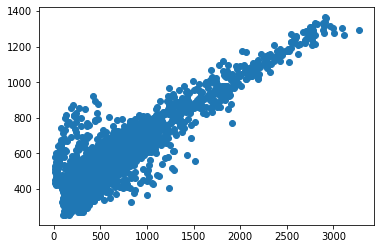

In [ ]:
plt.scatter(x,y)

In [ ]:
def split_data_bs(df):
  call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(df[['Strike Price','Expiration','Adj Close','Price']],df['bs_call'],test_size=0.2,random_state=42)
  return call_X_train, call_X_test, call_y_train, call_y_test

In [ ]:
call_X_train_bs, call_X_test_bs, call_y_train_bs, call_y_test_bs=split_data_bs(call_df)


In [ ]:
x_bs=np.array(call_y_test).reshape(-1,1)
y_bs=np.array(call_y_test_bs).reshape(-1,1)
reg_bs=LinearRegression().fit(x_bs,y_bs)
mae_bs= mean_absolute_error(x_bs,y_bs)
mse_bs=mean_squared_error(x_bs,y_bs)

ValueError: ignored

In [ ]:
print(reg_bs.score(x_bs,y_bs),mae_bs,mse_bs)


In [ ]:
Explained_VAR_bs=1-(np.std(x_bs)/np.std(y_bs))
Explained_VAR_bs